## Breast Cancer Data Analysis

Data from the NIH SEER cancer incidence database.

In [1]:
### Import modules ###

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import ttest_ind
import pickle

## Obtain data

In [2]:
census_race_counts = pd.read_csv('datasets/census_race_counts.csv', index_col='Year')
diagnoses_per_year_per_race = pd.read_csv('datasets/diagnoses_per_year_per_race.csv', index_col='Year')

display(census_race_counts)
display(diagnoses_per_year_per_race)

,White,Black,Native American,Asian and PI
Year,,,,
1980,188371622.0,26495025.0,1420400.0,3500439.0
1990,199686070.0,29986060.0,1959234.0,7273662.0
2000,211460626.0,34658190.0,2475956.0,10641833.0
2010,223553265.0,38929319.0,2932248.0,15214265.0


,White,Black/African-American,Native American,Asian and Pacific Islander
Year,,,,
1980,9633,732,25,325
1990,15366,1352,52,892
2000,19847,2015,115,1562
2010,20969,2765,167,2525


In [3]:
race_labels = ['White', 'Black/African-American', 'Native American', 'Asian and Pacific Islander']

plot_years = ['1980', '1990', '2000', '2010']

white_counts = diagnoses_per_year_per_race['White']
black_counts = diagnoses_per_year_per_race['Black/African-American']
n_american_counts = diagnoses_per_year_per_race['Native American']
asian_pacific_counts = diagnoses_per_year_per_race['Asian and Pacific Islander']

## Bar graph

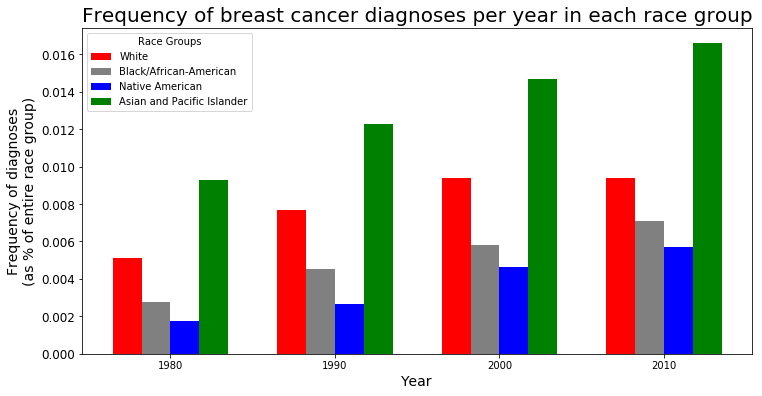

In [4]:
# Create stacked bar graph to display proportions of people in each
# race group in dataset who were diagnosed with breast cancer.

fig, ax = plt.subplots(figsize=(12,6))

x_vals = np.arange(4)
width=0.35

ax.bar(x_vals-3*width/4, white_counts*100/census_race_counts['White'][:4], width/2, color='red')
ax.bar(x_vals-width/4, black_counts*100/census_race_counts['Black'][:4], width/2, color='grey')
ax.bar(x_vals+width/4, n_american_counts*100/census_race_counts['Native American'][:4], width/2, color='blue')
ax.bar(x_vals+3*width/4, asian_pacific_counts*100/census_race_counts['Asian and PI'][:4], width/2, color='green')

ax.set_title('Frequency of breast cancer diagnoses per year in each race group', fontsize=20)
ax.set_ylabel('Frequency of diagnoses\n(as % of entire race group)', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
plt.xticks(np.arange(4), plot_years)
plt.yticks(fontsize=12)

colors = {0: 'red', 1: 'grey', 2: 'blue', 3: 'green'}
legend_boxes = []
for col_i in range(0, 4):
    box = Rectangle((0, 0), 1, 1, fc=colors[col_i])
    legend_boxes.append(box)
ax.legend(legend_boxes, race_labels, title="Race Groups", \
              loc="upper left")

plt.show()

In [5]:
age_data = pd.read_csv('datasets/age_data.csv', index_col='Race')
display(age_data)

,Ages
Race,
White,"[89, 73, 50, 71, 45, 65, 41, 54, 61, 83, 77, 8..."
Black/African-American,"[67, 39, 54, 63, 25, 74, 64, 54, 51, 51, 74, 7..."
Native American,"[67, 69, 93, 46, 68, 66, 51, 47, 52, 73, 73, 4..."
Asian,"[46, 70, 54, 58, 45, 47, 49, 31, 31, 31, 56, 5..."
Pacific Islander,"[35, 83, 60, 48, 37, 46, 68, 40, 37, 45, 85, 5..."


In [6]:
with open('datasets/white.pkl', 'rb') as f:
    white_ages = pickle.load(f)
with open('datasets/black.pkl', 'rb') as f:
    black_ages = pickle.load(f)
with open('datasets/n_american.pkl', 'rb') as f:
    n_american_ages = pickle.load(f)
with open('datasets/asian.pkl', 'rb') as f:
    asian_ages = pickle.load(f)
with open('datasets/pi.pkl', 'rb') as f:
    p_islander_ages = pickle.load(f)

## Box plot

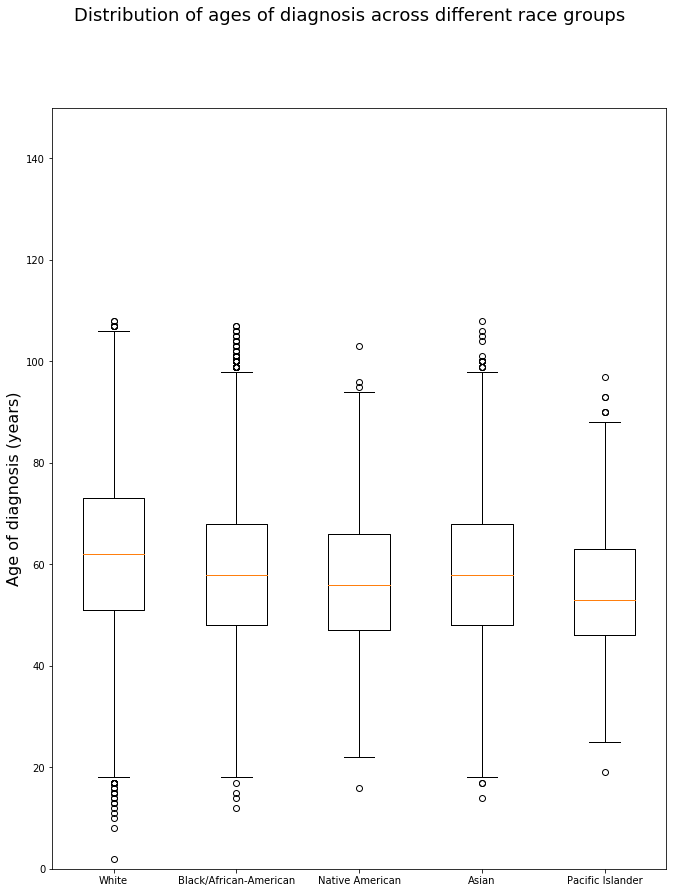

In [7]:
# create box plot

fig, ax = plt.subplots(figsize=(11,14))

ax.boxplot([white_ages, black_ages, n_american_ages, asian_ages, p_islander_ages])

plt.suptitle('Distribution of ages of diagnosis across different race groups', fontsize=18)
ax.set_ylabel('Age of diagnosis (years)', fontsize=16)

ax.set_xticklabels(age_data.index)
ax.set_ylim(0, 150)

plt.show()

## Two-sample hypothesis tests

In [8]:
# two-sample hypothesis test for difference of mean age of diagnosis

t_val, p_val = ttest_ind(white_ages, black_ages, \
                         equal_var=False)

print("Test statistic: " + str(t_val))
print("p-value: " + str(p_val))

Test statistic: 71.06412613776335
p-value: 0.0


In [9]:
# two-sample hypothesis test for difference of mean age of diagnosis

t_val, p_val = ttest_ind(white_ages, n_american_ages, \
                         equal_var=False)

print("Test statistic: " + str(t_val))
print("p-value: " + str(p_val))

Test statistic: 25.05306243816418
p-value: 4.0034161986034325e-129


In [10]:
# two-sample hypothesis test for difference of mean age of diagnosis

t_val, p_val = ttest_ind(white_ages, asian_ages, \
                         equal_var=False)

print("Test statistic: " + str(t_val))
print("p-value: " + str(p_val))

Test statistic: 65.81392702030915
p-value: 0.0


In [11]:
# two-sample hypothesis test for difference of mean age of diagnosis

t_val, p_val = ttest_ind(white_ages, p_islander_ages, \
                         equal_var=False)

print("Test statistic: " + str(t_val))
print("p-value: " + str(p_val))

Test statistic: 9.494387186586192
p-value: 3.685166724607474e-19


## Histogram

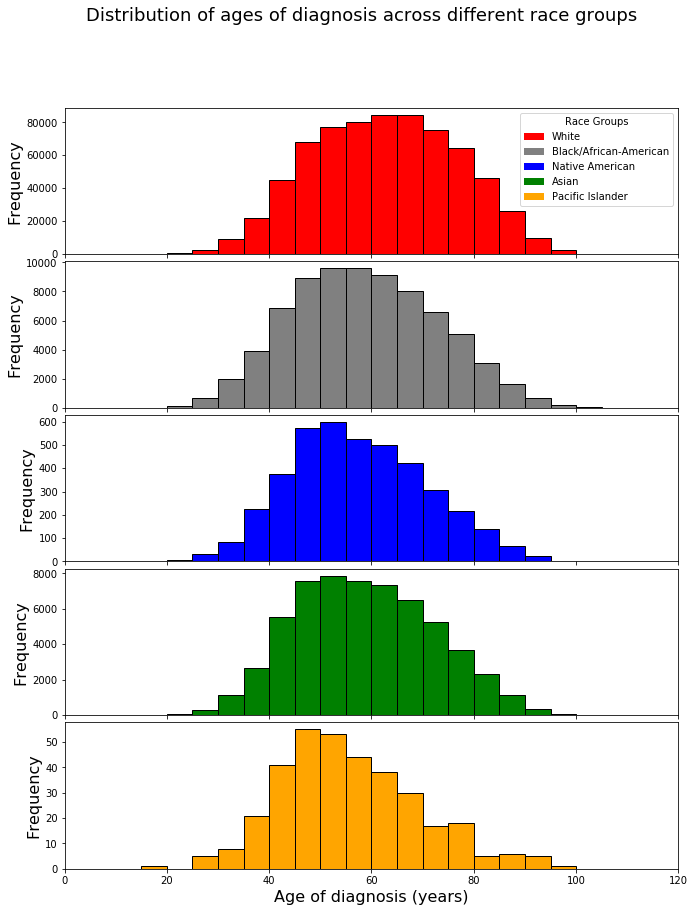

In [12]:
# create histogram

fig, axs = plt.subplots(5, 1, figsize=(11,14), sharex=True, \
                        gridspec_kw={'hspace': 0.05})

legend_labels = age_data.index
colors = {0: 'red', 1: 'grey', 2: 'blue', 3: 'green', 4: 'orange'}
legend_boxes = []
for col_i in range(0, 5):
    box = Rectangle((0, 0), 1, 1, fc=colors[col_i])
    legend_boxes.append(box)

axs[0].hist(white_ages, bins=np.arange(0, 120, 5), color=colors[0], edgecolor="black")
axs[1].hist(black_ages, bins=np.arange(0, 120, 5), color=colors[1], edgecolor="black")
axs[2].hist(n_american_ages, bins=np.arange(0, 120, 5), color=colors[2], edgecolor="black")
axs[3].hist(asian_ages, bins=np.arange(0, 120, 5), color=colors[3], edgecolor="black")
axs[4].hist(p_islander_ages, bins=np.arange(0, 120, 5), color=colors[4], edgecolor="black")

plt.suptitle('Distribution of ages of diagnosis across different race groups', fontsize=18)
for ax in axs:
    ax.set_ylabel('Frequency', fontsize=16)

axs[4].set_xlabel('Age of diagnosis (years)', fontsize=16)
axs[4].set_xlim(0, 120)
axs[0].legend(legend_boxes, legend_labels, title="Race Groups", \
              loc="upper right")

plt.show()